In [47]:
#%% Loop across distances and valuations to generate double-pendulum distance/time predictions. 
import DoublePendulumClass as dp
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

sim = dp.doublePendulum()

x = 0.0
ys = 0.1
xystart = np.array([x,ys])

loopValuation = np.array([.05,.5,.75, 1, 2, 3, 4, 5])
loopdist = np.array([.01,.025,.05, .1,.2,.3,.4,.5])
distcolors = ['#f7fcf0','#e0f3db','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081']
duration = np.ndarray([len(loopValuation), len(loopdist)])
J = np.ndarray([len(loopValuation), len(loopdist)])
frCost = np.ndarray([len(loopValuation), len(loopdist)])
workCost = np.ndarray([len(loopValuation), len(loopdist)])
timeCost = np.ndarray([len(loopValuation), len(loopdist)])
peakhandspeed = np.ndarray([len(loopValuation), len(loopdist)])

rows = list()
columns = list() 

jco = 0
ico = 0
for j in loopValuation:
  for i in loopdist:
    duration[jco,ico], J[jco,ico], workCost[jco,ico], frCost[jco,ico], timeCost[jco,ico],\
      peakhandspeed[jco,ico],result = \
      sim.movementTimeOpt(xystart,xystart + np.array([x,i]), \
        theTimeValuation=j, N = 60, theGeneratePlots=0)
    ico += 1
    columns.append(result)
  jco += 1
  ico = 0
  rows.append(columns)
  columns = []
# %%


This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3448
Number of nonzeros in inequality constraint Jacobian.:     1405
Number of nonzeros in Lagrangian Hessian.............:     1818

Total number of variables............................:     1221
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      628
Total number of inequality constraints...............:      856
        inequality constraints with only lower bounds:      245
   inequality constraints with lower and upper bounds:      122
        inequality constraints with only upper bounds:      489

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

(0.0, 7.0)

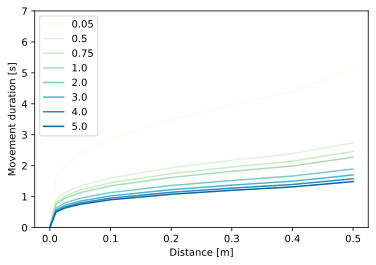

In [48]:
#%% Figure 1: distance / time 

f,ax = plt.subplots()
for v in range(0,len(loopValuation)):
#v = 0
  xtemp = loopdist.copy()
  y = duration.copy()
  y = y[v,:]
  ytemp = np.concatenate(([0],y))

  xtemp = np.concatenate(([0],xtemp))
  plt.plot(xtemp,ytemp,label=loopValuation[v],color = distcolors[v])
plt.legend()
# %%
plt.xlabel("Distance [m]")
plt.ylabel("Movement duration [s]")
ax.set_ylim(0,7)


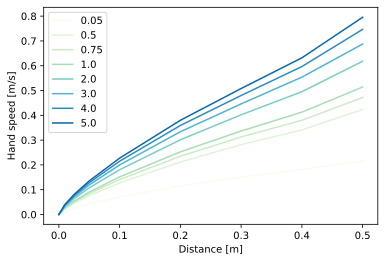

In [49]:
#%% Figure 2: distance peak speed / distance
f,ax = plt.subplots()
for v in range(0,len(loopValuation)):
#v = 0
  xtemp = loopdist.copy()
  y = peakhandspeed.copy()
  y = y[v,:]
  ytemp = np.concatenate(([0],y))

  xtemp = np.concatenate(([0],xtemp))
  plt.plot(xtemp,ytemp, label=loopValuation[v],color = distcolors[v])
  plt.xlabel("Distance [m]")
  plt.ylabel("Peak hand speed [m/s]")
  plt.legend()
# %%

Text(0.5, 0, 'Time [s]')

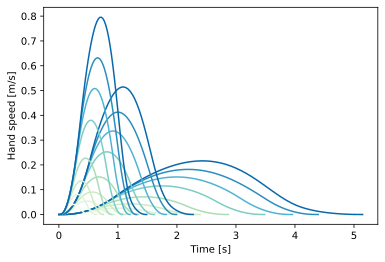

In [50]:
#%% Figure 3: 3 valuations, hand speed vs time
def plotBells(theList):
  for i in range(0,len(theList)):
    tempStruct = theList[i]  
    plt.plot(tempStruct.time,tempStruct.handvel,distcolors[i])

f,ax = plt.subplots()
plotBells(rows[0])
plotBells(rows[3])
plotBells(rows[-1])
plt.ylabel("Hand speed [m/s]")
plt.xlabel("Time [s]")


In [ ]:
y.shape